In [13]:
import xarray as xr
import cmocean

In [8]:
ds_uv = xr.open_zarr((
    "/home/jovyan/shared_data/data/copernicus/"
    "GLOBAL_ANALYSISFORECAST_PHY_001_024/"
    "cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_uo-vo_28.00W-12.00W_8.00N-20.00N_0.49-5727.92m_2020-11-01-2024-03-15.zarr"
))

ds_uv

<xarray.Dataset>
Dimensions:    (depth: 50, latitude: 145, longitude: 193, time: 1231)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 8.0 8.083 8.167 8.25 ... 19.83 19.92 20.0
  * longitude  (longitude) float32 -28.0 -27.92 -27.83 ... -12.17 -12.08 -12.0
  * time       (time) datetime64[ns] 2020-11-01 2020-11-02 ... 2024-03-15
Data variables:
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(177, 2, 32, 64), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(177, 2, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.8
    area:                      Global
    contact:                   https://marine.copernicus.eu/contact
    copernicusmarine_version:  1.0.3
    credit:                    E.U. Copernicus Marine Service Information (CM...
    institution:               Mercator Ocean International
    licence:                   http://marine.copernicus.eu/services-portfolio...
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    references:                http://marine.copernicus.eu
    source:                    MOI GLO12
    title:                     daily mean fields from Global Ocean Physics An...

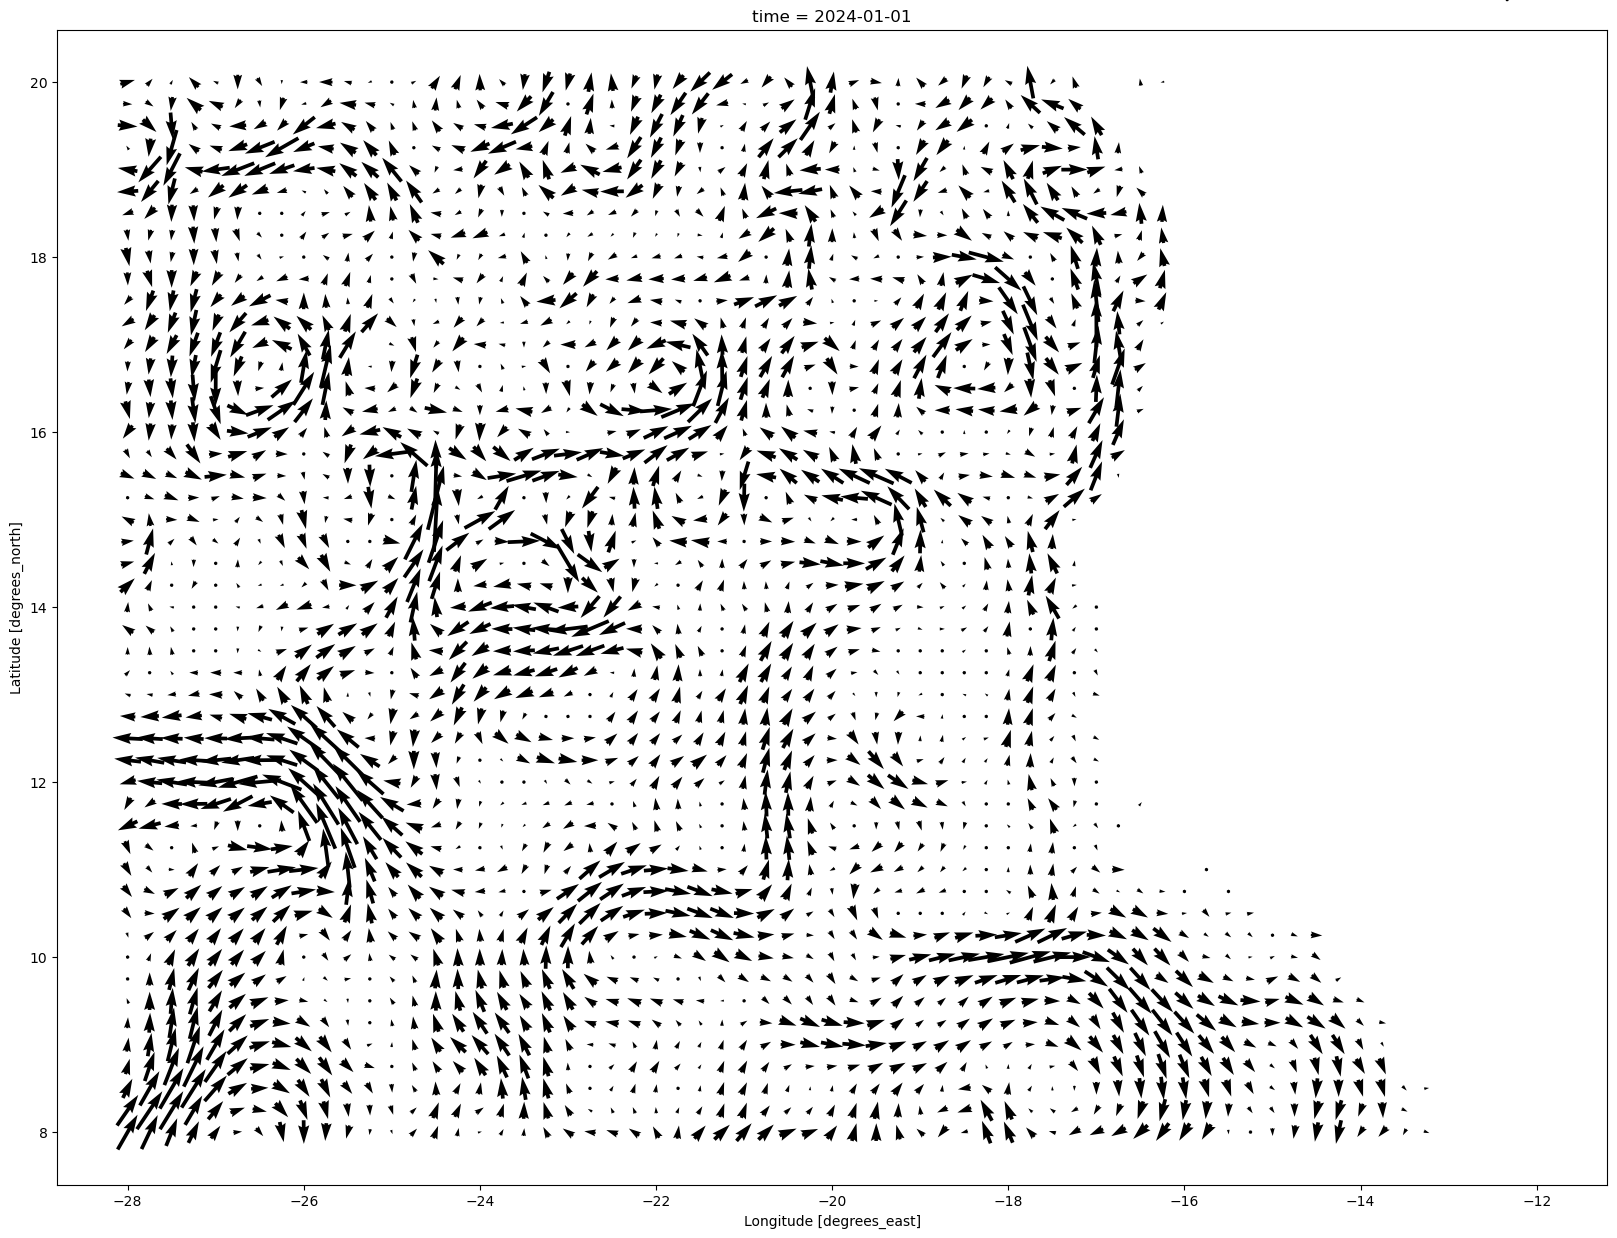

In [9]:
(
    ds_uv
    .sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2024-01-01")
    .isel(longitude=slice(None, None, 3), latitude=slice(None, None, 3))
    .plot.quiver(
        x="longitude", y="latitude",
        u="uo", v="vo",
        size=15,
    )
)

In [11]:
ds_t = xr.open_zarr((
    "/home/jovyan/shared_data/data/copernicus/"
    "GLOBAL_ANALYSISFORECAST_PHY_001_024/"
    "cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m_thetao_28.00W-12.00W_8.00N-20.00N_0.49-5727.92m_2020-11-01-2024-03-15.zarr"
))

ds_t

<xarray.Dataset>
Dimensions:    (depth: 50, latitude: 145, longitude: 193, time: 1231)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 8.0 8.083 8.167 8.25 ... 19.83 19.92 20.0
  * longitude  (longitude) float32 -28.0 -27.92 -27.83 ... -12.17 -12.08 -12.0
  * time       (time) datetime64[ns] 2020-11-01 2020-11-02 ... 2024-03-15
Data variables:
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(177, 2, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.8
    area:                      Global
    contact:                   https://marine.copernicus.eu/contact
    copernicusmarine_version:  1.0.3
    credit:                    E.U. Copernicus Marine Service Information (CM...
    institution:               Mercator Ocean International
    licence:                   http://marine.copernicus.eu/services-portfolio...
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    references:                http://marine.copernicus.eu
    source:                    MOI GLO12
    title:                     daily mean fields from Global Ocean Physics An...

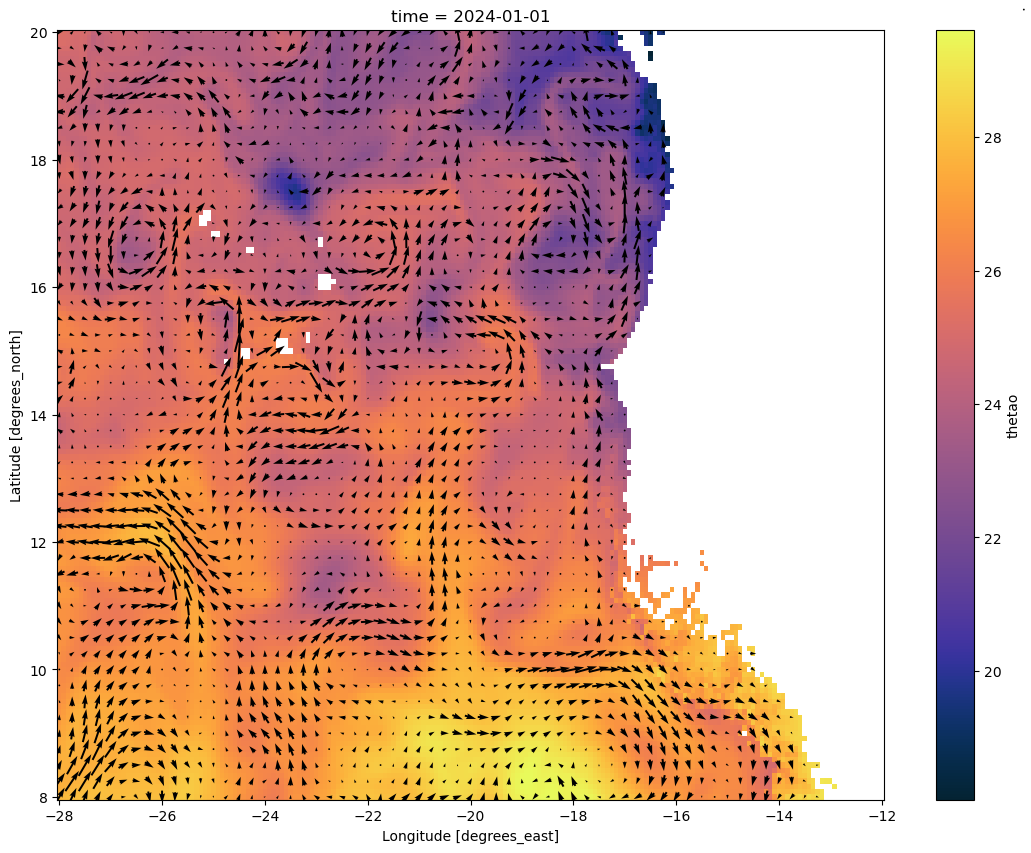

In [16]:
(
    ds_t
    .sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2024-01-01")
    .thetao
    .plot(
        x="longitude", y="latitude",
        cmap=cmocean.cm.thermal,
        size=10,
    )
)

(
    ds_uv
    .sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2024-01-01")
    .isel(
        longitude=slice(None, None, 3),
        latitude=slice(None, None, 3),
    )
    .plot.quiver(
        x="longitude", y="latitude",
        u="uo", v="vo",
    )
)